# Solution (4.12)

```{solution} ex_2d_arrays_downsampling
```

## Downsampling



Let's think about the approach we will take to downsampling the image. To downsample by a factor of two, the pseudocode might look like this:

:::{card}

    Load necessary libraries
    
    Load image to downsample
    
    Calculate shape of new image
    
    For each cell in new image:
        Set value as average of cells in original image
        
    Display new image
:::

This pseudocode is written to be succinct - each step may correspond to multiple lines of code, but this provides a framework to work from. We could write more detailed pseudocode for each step. 
The most complicated steps will be to calculate the shape of the new image and to calculate the values of the new image. 

To load the necessary libraries and the image we can do:
```
import numpy as np
import matplotlib.pyplot as plt

x = np.loadtxt("falling_cat.txt")
```

To calculate the shape of the new image, we can use the function `np.shape` - like we saw in the workshop. As we want to downsample by a factor of 2, we will divide the image into 2 by 2 blocks and reduce each one to a single block. So every 2 rows become a single row, and every two columns become a single column. If the image has an odd number of rows or columns, we will ignore the extra row/column. To calculate the number of new rows and columns we will need we can use floor division. We can pass these values to `np.zeros` to create the new image that we will fill in
```
n, m = x.shape

n_out = n // 2
m_out = m // 2

y = np.zeros((n_out, m_out))
```

Now for each cell in the new image, we need to find the corresponding cells in the old image and take the average. We iterate throught the cells in the new image using two nested for loops. To work out the index of the subarray we want let's think about some examples:
- The new cell at $(0, 0)$ will contain the average of the old cells $(0, 0), (0, 1), (1, 0), (1, 1)$;
- the new cell at $(1, 0)$ will contain the average of the old cells $(2, 0), (2, 1), (3, 0), (3, 1)$. 

So the new cell at $(i, j)$ will contain the average of the old cells $(2i, 2j), (2i, 2j+1), (2i+1, 2j), (2i+1, 2j+1)$. For array `x`, we can select  this subarray using `x[2*i:2*(i+1), 2*j:2*(j+1)]`. We can use `np.average` to calculate the average of the subarray.

```
for i in range(n_out):
    for j in range(m_out):
        y[i, j] = np.average(x[2*i:2*(i+1), 2*j:2*(j+1)])
        
plt.imshow(y, cmap = "gray")
```

Putting this altogether we get:

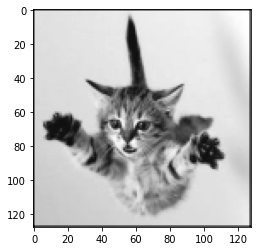

In [19]:
# Load necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Load image
x = np.loadtxt("falling_cat.txt")

# Calculate shape of new image
n, m = x.shape

n_out = n // 2
m_out = m // 2

y = np.zeros((n_out, m_out))

# Set value for each cell in new image
for i in range(n_out):
    for j in range(m_out):
        y[i, j] = np.average(x[2*i:2*(i+1), 2*j:2*(j+1)])

# Display new image
plt.imshow(y, cmap="gray")

## Turning into a function

Now we need to write a function that is able to downsample by a factor `k`. Let's think about how we need to change the code above to work for any value of `k`:
- The size of the new image will be `n_out // k` by `m_out // k`
- The subarray that we need the average of will be `x[k*i:k*(i+1), k*j:k*(j+1)]`

Otherwise, the bulk of the code remains the same. 

In [20]:
def downsample(x, k):
    n, m = x.shape

    n_out = n // k
    m_out = m // k

    y = np.zeros((n_out, m_out))

    # Set value for each cell in new image
    for i in range(n_out):
        for j in range(m_out):
            y[i, j] = np.average(x[k*i:k*(i+1), k*j:k*(j+1)])

    # Display new image
    plt.imshow(y, cmap="gray")

To test the function, we know that when `k=1` we should just get the original image. When `k=2` we should see the image we generated in part 1. If we make `k` quite large (say 10) the image should get quite pixelated, and if we keep growing `k` eventually we will just get a single pixel. 

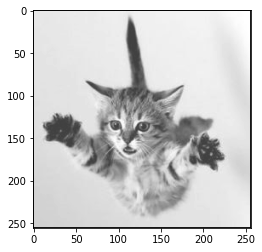

In [21]:
downsample(x, 1)

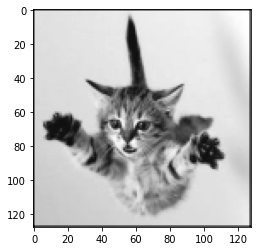

In [22]:
downsample(x, 2)

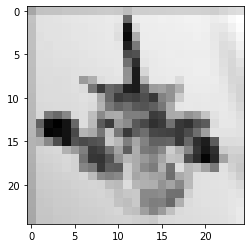

In [23]:
downsample(x, 10)

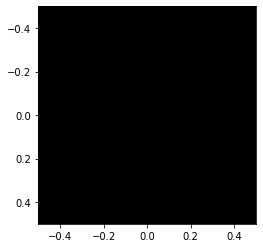

In [24]:
downsample(x, 200)

## Upsampling

The idea is similar here, but we want to make the image larger rather than smaller. The size of the new image will be `n*k` rows by `m*k` columns. The tricky part is assigning the subarray. When we downsample we want to take lots of cells from the old image and map them to one in the new image. For upsampling we want to take one cells from the image and map it onto many in the new image. We can either iterate through each individual cell in the new array and try and find the corresponding cell in the old array, or iterate through each individual cell in the old array and try and find the corresponding cells in the new array. Both approaches will end up with the same result. 

To iterate through the new array, the code is:
```
for i in range(n_out):
    for j in range(m_out):
        y[i, j] = x[i // k, j // k]
```

To iterate through the old array, the code is:
```
for i in range(n):
    for j in range(m):
        y[k*i:k*(i+1), k*j:k*(j+1)] = x[i, j]
```
This approach works because python allows us to assign multiple cells to have the same value. 

In [33]:
def upsample(x, k):
    n, m = x.shape

    n_out = n * k
    m_out = m * k

    y = np.zeros((n_out, m_out))

    # For each cell of new image retrieve corresponding cell from old image
    for i in range(n_out):
        for j in range(m_out):
            y[i, j] = x[i // k, j // k]

    # Display new image
    plt.imshow(y, cmap="gray")

It is harder to check that this works, because python displays all the figures at the same size regardless of the value of `k`, so whilst there are more cells the image appears unchanged. But notice that if we make `k` larger, the scale on the axes grows correspondingly, so the function must be working. 

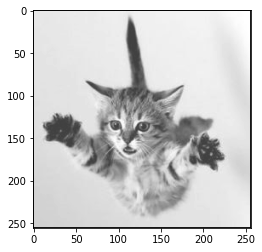

In [34]:
upsample(x, 1)

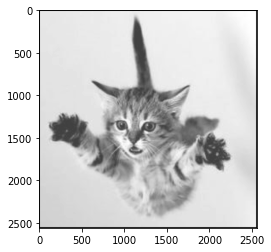

In [35]:
upsample(x, 4)

In [1]:
upsample(x, 10)

NameError: name 'upsample' is not defined